In [1]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

In [42]:
reg=pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data.xlsx", sheet_name='COX data')
reg.head()

,Group ID,Study ID,Event Name,Gender,MND type,Site of onset,Motor neurone-dominant features from onset,Date of birth,Sample Date,Age at visit,...,C5,TPP2,C3,TSC22D1,PLEC,TF,BCL2L1,EIF4A3,CHGB,NEFH
0,ALS F1,UCH00136,Index-Case Baseline,female,ALS,"Bulbar, UL",NaN,1935-09-18,2014-09-25,79.0,...,15.364966,11.293299,12.450258,10.493055,8.532551,18.095873,11.726218,8.915282,8.866352,8.518063
1,ALS F10,UCH00153,Index-Case Baseline,male,ALS,Bulbar,NaN,1941-10-18,2015-08-13,73.0,...,15.366326,11.280191,12.980086,10.497453,8.492654,18.134419,10.533330,8.873136,9.021813,9.932953
2,ALS F11,UCH00093,Index-Case Baseline,male,ALS,LL,NaN,1937-01-27,2013-12-19,76.0,...,15.290541,9.816824,12.278014,10.048078,9.548629,17.905072,10.316395,8.997462,9.239360,8.434628
3,ALS F12,UCH00142,Index-Case Baseline,male,ALS,LL,NaN,1946-06-11,2015-01-29,68.0,...,15.750880,10.727155,13.148445,10.454608,8.628263,18.158875,11.030667,8.862327,9.508389,8.939873
4,ALS F13,BUH00447,Index-Case Baseline,male,ALS,Bulbar,PBP - Progressive Bulbar Palsy,1937-04-18,2017-06-28,80.0,...,15.224337,10.149620,11.866545,10.509775,8.776104,17.947340,10.927111,8.867279,9.395534,8.514122


In [43]:
# Standardize column names
reg.columns = reg.columns.str.strip().str.lower().str.replace(" ", "_")


In [44]:
print(reg.columns.tolist())

['group_id', 'study_id', 'event_name', 'gender', 'mnd_type', 'site_of_onset', 'motor_neurone-dominant_features_from_onset', 'date_of_birth', 'sample_date', 'age_at_visit', 'date_first_weakness_noticed', 'date_of_diagnosis', 'diagnostic_delay', 'age_at_onset', 'time_from_onset', 'time_from_diagnosis', 'alsfrsr', 'progression_rate_at_baseline', 'rip_date', 'rip_age', 'survival', 'outcome_1-rip', 'features_of_fronto-temporal_involvement', 'als_diagnostic_classification', 'on_riluzole', 'tnr', 'apol1', 'nudt16l1', 'islr2', 'gstp1', 'nrxn3', 'apoa4', 'dazap1', 'ehd2', 'c5', 'tpp2', 'c3', 'tsc22d1', 'plec', 'tf', 'bcl2l1', 'eif4a3', 'chgb', 'nefh']


In [45]:
# Keep only ALS rows
reg_als = reg[reg['group_id'].str.startswith('ALS ')].copy()

In [24]:
reg_als


,group_id,study_id,event_name,gender,mnd_type,site_of_onset,motor_neurone-dominant_features_from_onset,date_of_birth,sample_date,age_at_visit,...,c5,tpp2,c3,tsc22d1,plec,tf,bcl2l1,eif4a3,chgb,nefh
0,ALS F1,UCH00136,Index-Case Baseline,female,ALS,"Bulbar, UL",NaN,1935-09-18,2014-09-25,79,...,15.364966,11.293299,12.450258,10.493055,8.532551,18.095873,11.726218,8.915282,8.866352,8.518063
1,ALS F10,UCH00153,Index-Case Baseline,male,ALS,Bulbar,NaN,1941-10-18,2015-08-13,73,...,15.366326,11.280191,12.980086,10.497453,8.492654,18.134419,10.533330,8.873136,9.021813,9.932953
2,ALS F11,UCH00093,Index-Case Baseline,male,ALS,LL,NaN,1937-01-27,2013-12-19,76,...,15.290541,9.816824,12.278014,10.048078,9.548629,17.905072,10.316395,8.997462,9.239360,8.434628
3,ALS F12,UCH00142,Index-Case Baseline,male,ALS,LL,NaN,1946-06-11,2015-01-29,68,...,15.750880,10.727155,13.148445,10.454608,8.628263,18.158875,11.030667,8.862327,9.508389,8.939873
4,ALS F13,BUH00447,Index-Case Baseline,male,ALS,Bulbar,PBP - Progressive Bulbar Palsy,1937-04-18,2017-06-28,80,...,15.224337,10.149620,11.866545,10.509775,8.776104,17.947340,10.927111,8.867279,9.395534,8.514122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,ALS S5,UCH00160,Index-Case Baseline,male,ALS,UL,Upper motor neurone-dominant,1954-04-12,2015-09-17,61,...,15.014491,10.746346,12.202705,10.763959,8.578184,18.132724,11.285691,8.825595,9.268425,8.611025
46,ALS S6,UCH00101,Index-Case Baseline,male,ALS,"UL, LL",NaN,1961-10-18,2014-02-06,52,...,15.326507,9.986838,12.505514,10.697054,8.672425,17.851607,10.966145,8.758889,8.993505,9.177669
47,ALS S7,UCH00040,Index-Case Baseline,male,ALS,UL,NaN,1943-12-28,2012-04-12,68,...,15.293306,11.043574,12.082981,10.100400,8.437960,18.015008,10.322717,9.413839,9.307429,8.446670
48,ALS S8,UCH00141,Index-Case Baseline,male,ALS,UL,NaN,1985-04-16,2015-01-15,29,...,15.342922,10.903581,12.137664,10.781196,8.643495,17.950322,11.395534,8.676662,8.844863,8.652128


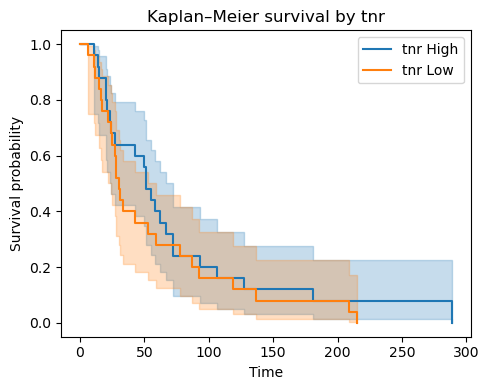

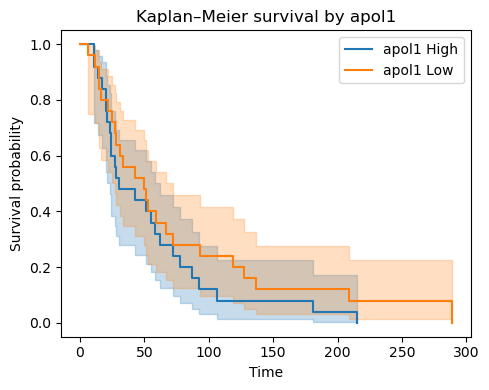

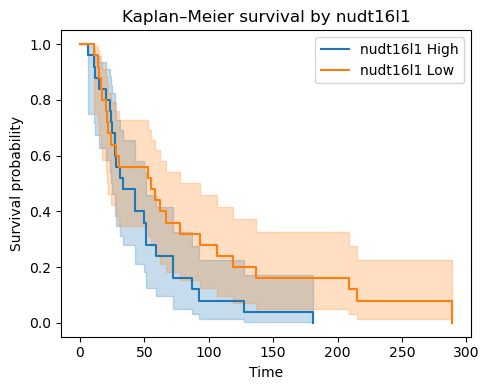

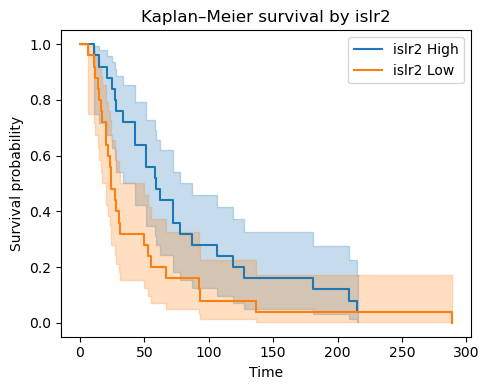

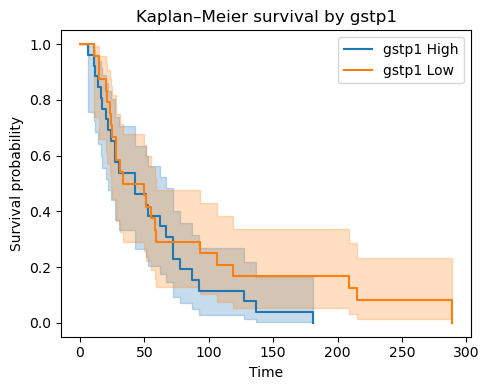

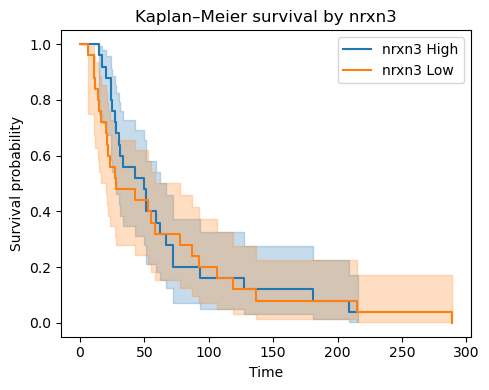

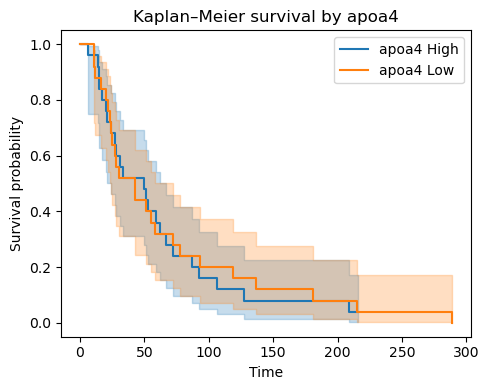

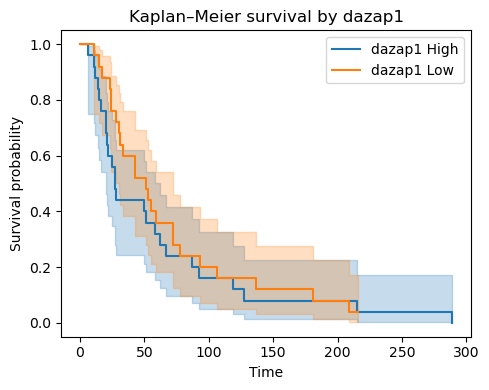

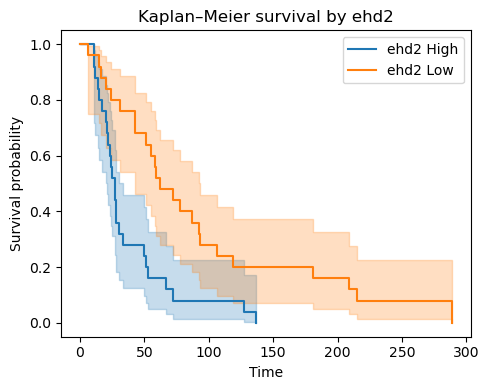

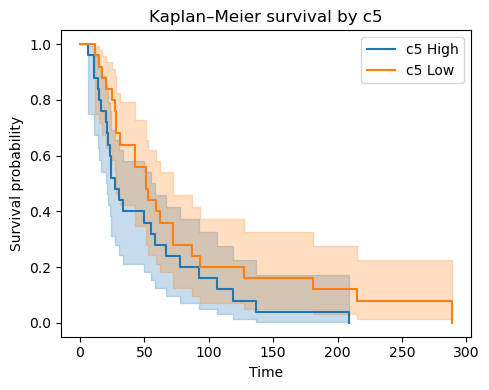

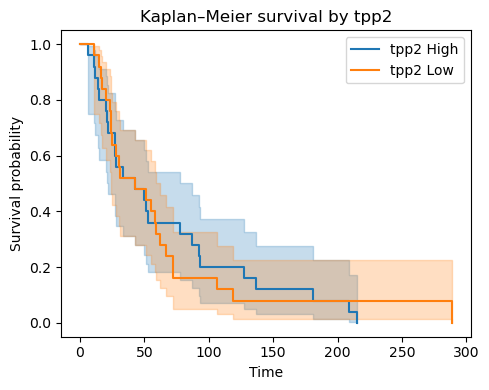

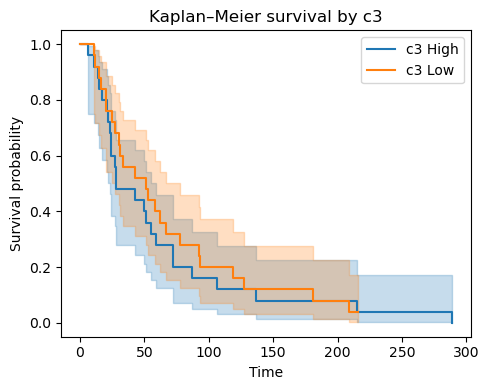

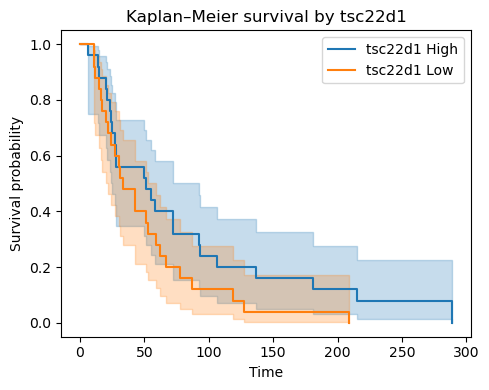

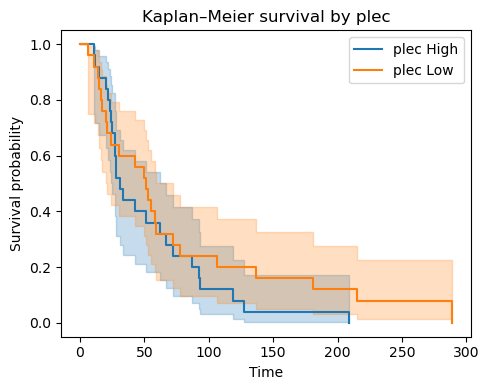

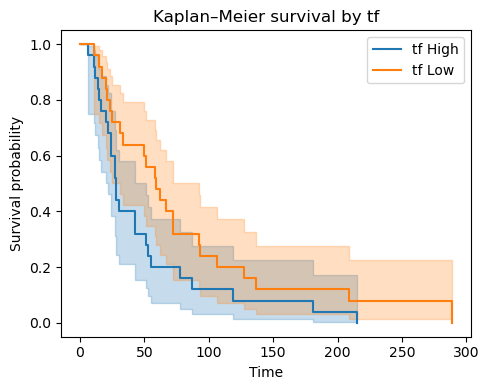

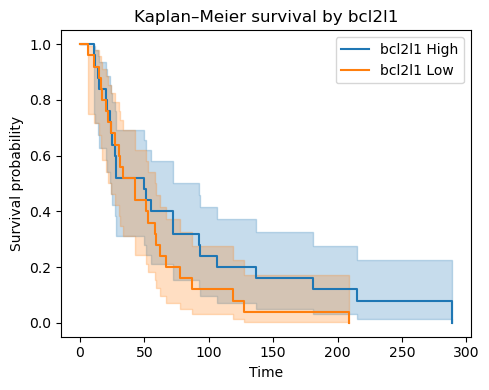

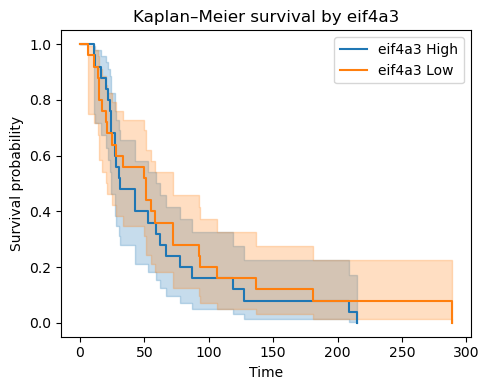

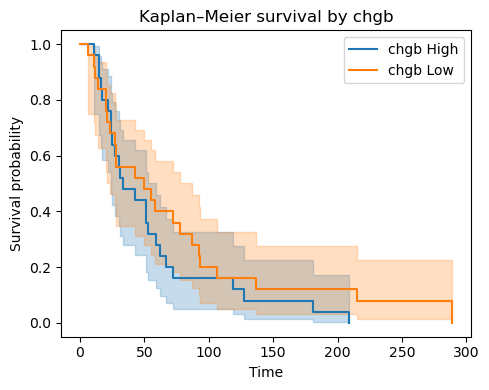

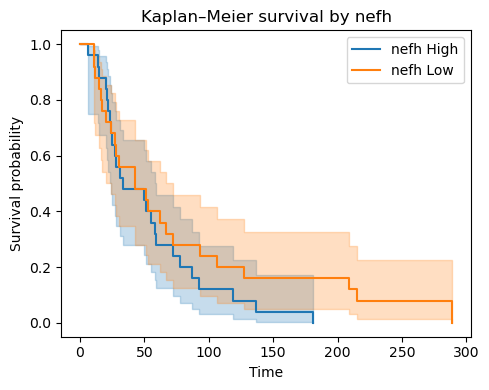

     protein     cutoff   p_value  reject_fdr_0.05     p_adj
8       ehd2  12.905216  0.001026             True  0.019487
3      islr2  11.600290  0.030952            False  0.294044
14        tf  17.999782  0.057823            False  0.366212
9         c5  15.330591  0.096510            False  0.366738
2   nudt16l1  12.611502  0.084674            False  0.366738
12   tsc22d1  10.495254  0.120876            False  0.382775
15    bcl2l1  10.938216  0.198704            False  0.489444
17      chgb   9.159744  0.283362            False  0.489444
18      nefh   8.592456  0.258793            False  0.489444
4      gstp1  11.040290  0.251066            False  0.489444
1      apol1  15.466579  0.276502            False  0.489444
13      plec   8.641689  0.310029            False  0.490880
0        tnr   9.833126  0.366168            False  0.535169
7     dazap1   8.928208  0.433048            False  0.587708
16    eif4a3   8.912737  0.493418            False  0.624997
11        c3  12.466169 

In [25]:
proteins = ['tnr','apol1','nudt16l1','islr2','gstp1','nrxn3','apoa4','dazap1',
            'ehd2','c5','tpp2','c3','tsc22d1','plec','tf','bcl2l1','eif4a3','chgb','nefh']

results = []
pvals = []

for p in proteins:
    # Stratify patients by median expression of this protein
    cutoff = reg_als[p].median()
    reg_als['group'] = np.where(reg_als[p] >= cutoff, 'High', 'Low')
    
    mask_high = reg_als['group'] == 'High'
    mask_low  = reg_als['group'] == 'Low'
    
    kmf_high = KaplanMeierFitter().fit(reg_als.loc[mask_high, 'time_from_onset'],
                                       reg_als.loc[mask_high, 'outcome_1-rip'],
                                       label=f'{p} High')
    kmf_low  = KaplanMeierFitter().fit(reg_als.loc[mask_low, 'time_from_onset'],
                                       reg_als.loc[mask_low, 'outcome_1-rip'],
                                       label=f'{p} Low')
    
    # Plot KM curves
    plt.figure(figsize=(5,4))
    ax = kmf_high.plot(ci_show=True)
    kmf_low.plot(ax=ax, ci_show=True)
    plt.title(f'Kaplan–Meier survival by {p}')
    plt.xlabel('Time')
    plt.ylabel('Survival probability')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Log-rank test
    res = logrank_test(
        reg_als.loc[mask_high, 'time_from_onset'], reg_als.loc[mask_low, 'time_from_onset'],
        event_observed_A=reg_als.loc[mask_high, 'outcome_1-rip'],
        event_observed_B=reg_als.loc[mask_low, 'outcome_1-rip']
    )
    pvals.append(res.p_value)
    results.append({'protein': p, 'cutoff': cutoff, 'p_value': res.p_value})

# Multiple testing correction
mt = multipletests(pvals, alpha=0.05, method='fdr_bh')
for rec, (rej, p_adj) in zip(results, zip(mt[0], mt[1])):
    rec['reject_fdr_0.05'] = rej
    rec['p_adj'] = p_adj

results_df = pd.DataFrame(results).sort_values('p_adj')
print(results_df)

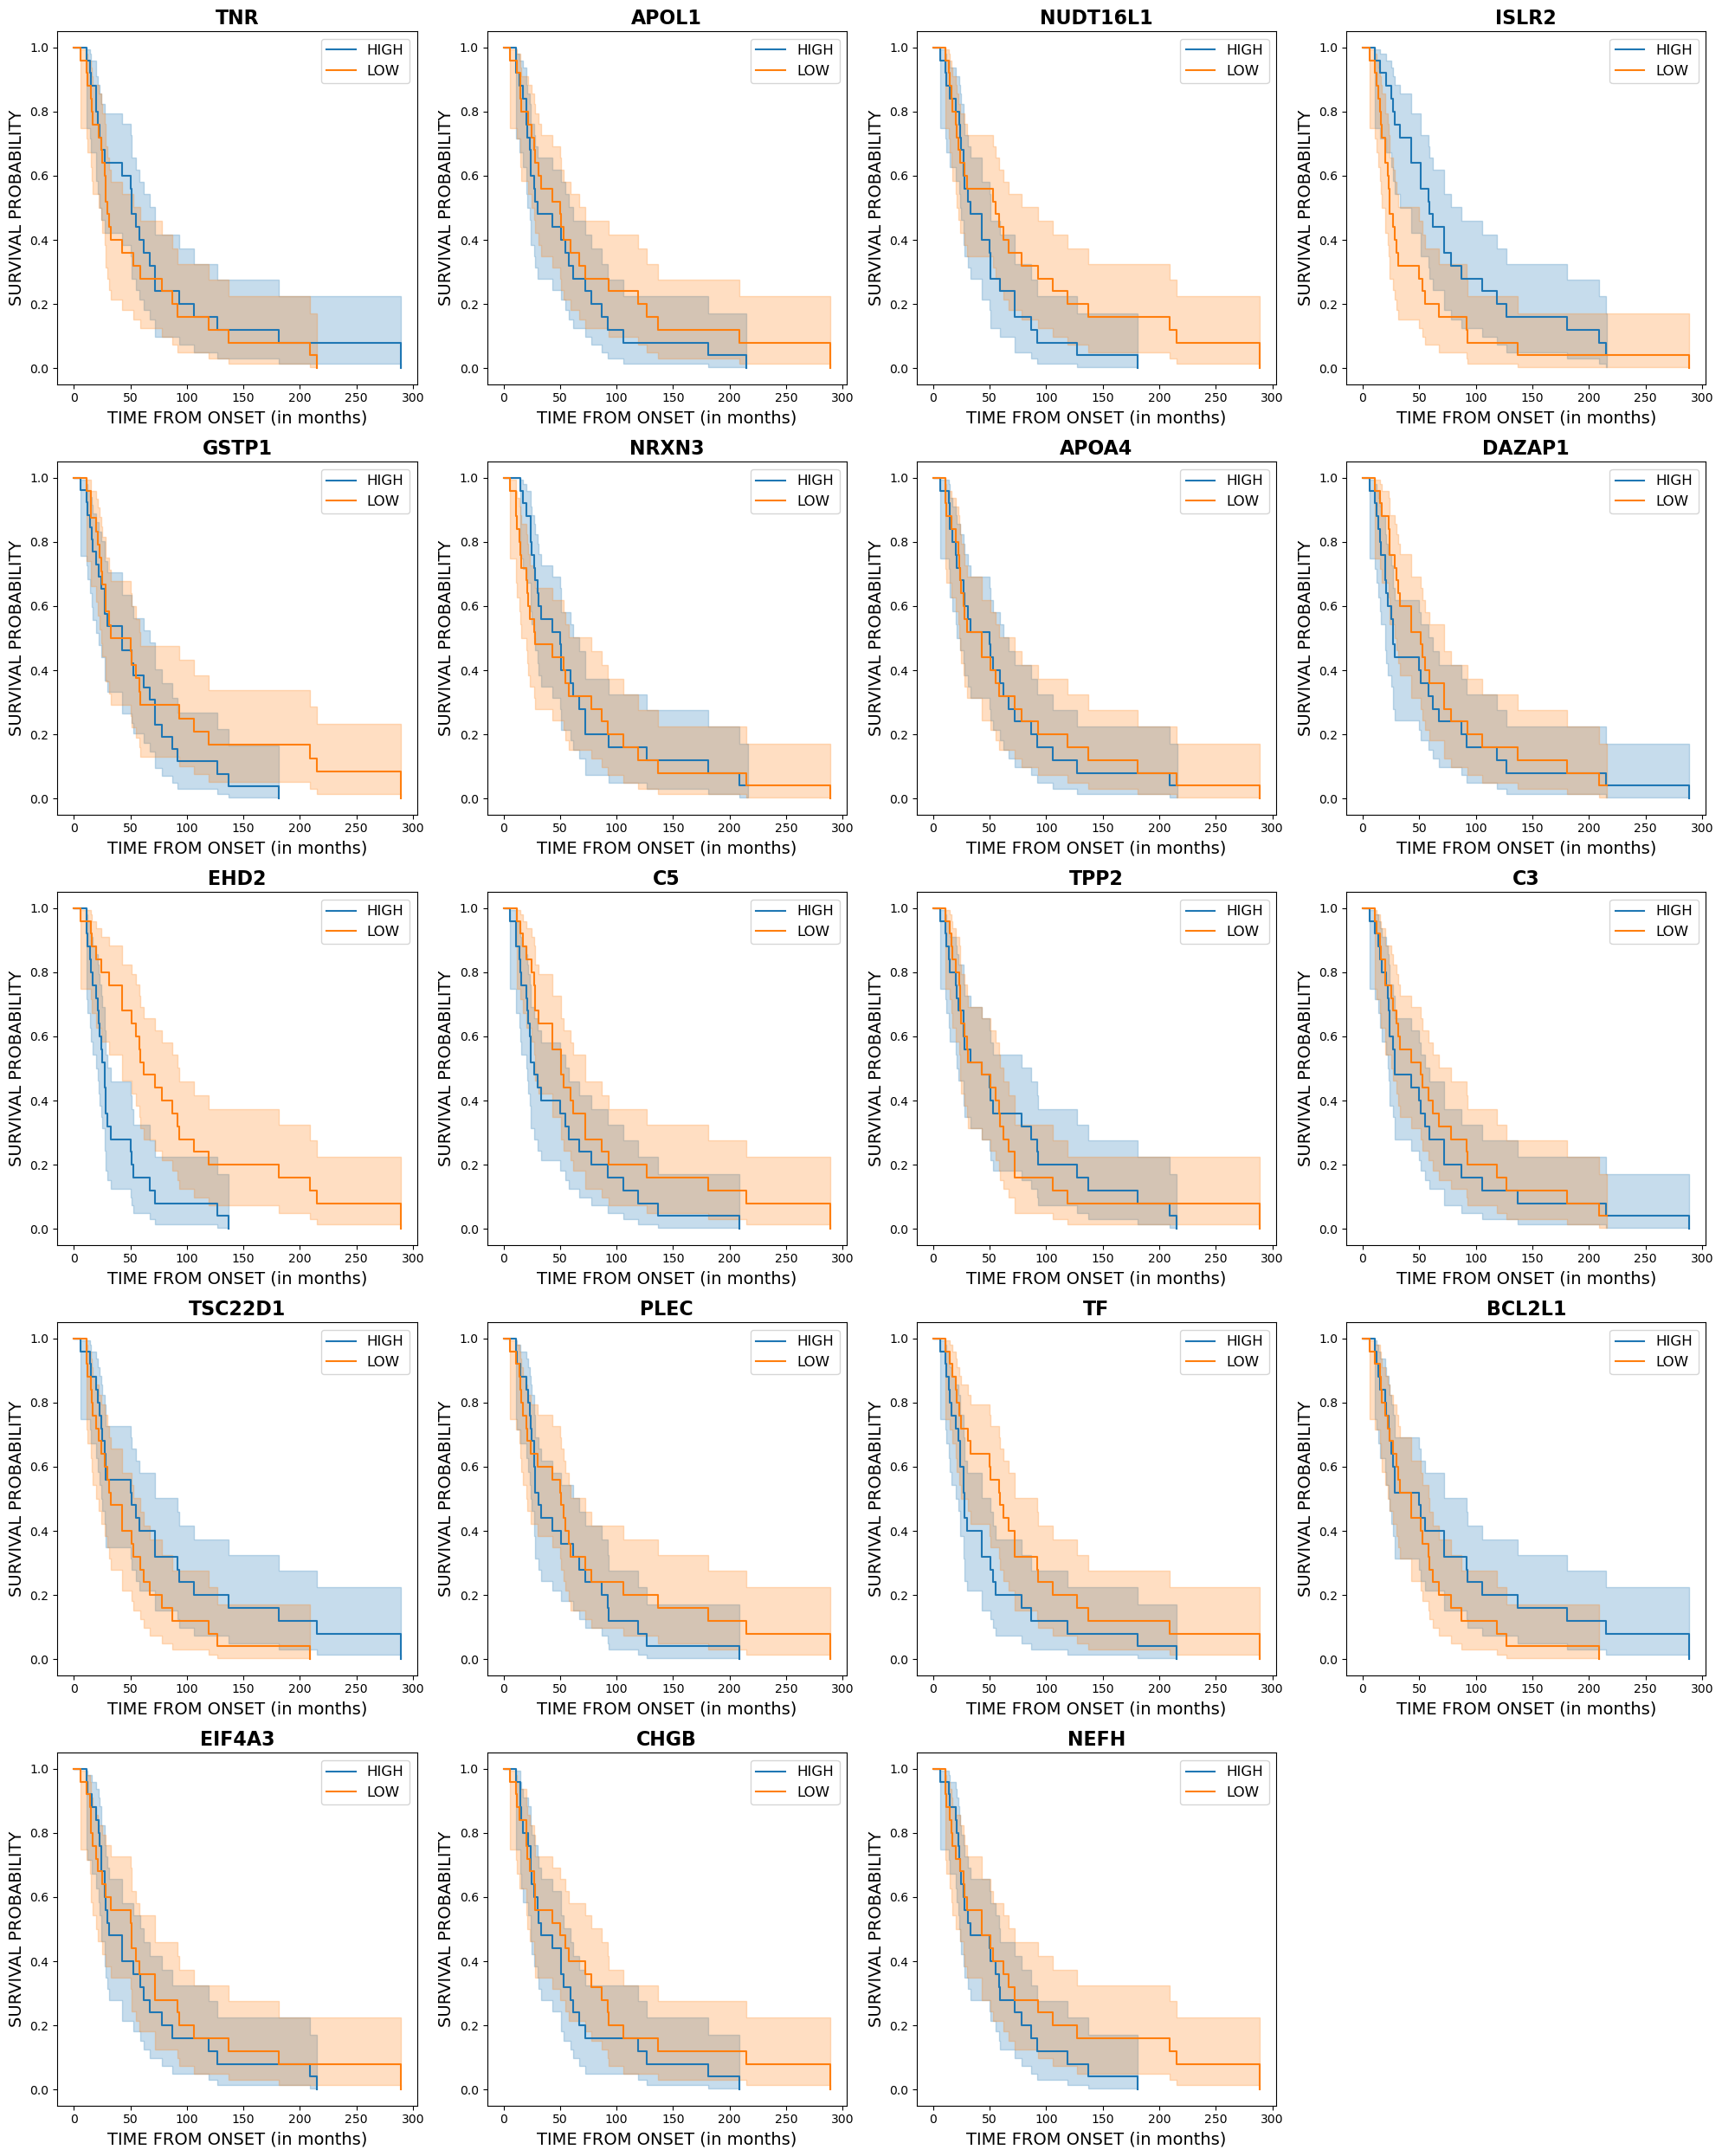

In [28]:
import math

n_proteins = len(proteins)
n_cols = 4
n_rows = math.ceil(n_proteins / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, p in enumerate(proteins):
    cutoff = reg_als[p].median()
    reg_als['group'] = np.where(reg_als[p] >= cutoff, 'High', 'Low')
    
    mask_high = reg_als['group'] == 'High'
    mask_low  = reg_als['group'] == 'Low'
    
    kmf_high = KaplanMeierFitter().fit(reg_als.loc[mask_high, 'time_from_onset'],
                                       reg_als.loc[mask_high, 'outcome_1-rip'],
                                       label='HIGH')
    kmf_low  = KaplanMeierFitter().fit(reg_als.loc[mask_low, 'time_from_onset'],
                                       reg_als.loc[mask_low, 'outcome_1-rip'],
                                       label='LOW')
    
    ax = axes[i]
    kmf_high.plot(ax=ax, ci_show=True)
    kmf_low.plot(ax=ax, ci_show=True)
    
    # Capitalized labels and larger font size
    ax.set_title(p.upper(), fontsize=16, fontweight='bold')
    ax.set_xlabel('TIME FROM ONSET (in months)', fontsize=14)
    ax.set_ylabel('SURVIVAL PROBABILITY', fontsize=14 )
    ax.legend(fontsize=12)
    
# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
# time of onset is calculated by date of first symptoms to date of death 


In [49]:
pval_map = {
    'tnr': 0.045858,
    'apol1': 0.045858,
    'nudt16l1': 0.007415,
    'islr2': 0.036502,
    'gstp1': 0.002243,
    'nrxn3': 0.004936,
    'apoa4': 0.023241,
    'dazap1': 0.038676,
    'ehd2': 0.026294,
    'c5': 0.007151,
    'tpp2': 0.037576,
    'c3': 0.001475,
    'tsc22d1': 0.047157,
    'plec': 0.032460,
    'tf': 0.023974,
    'bcl2l1': 0.024727,
    'eif4a3': 0.015831,
    'chgb': 0.0001,
    'nefh': 0.019855
}


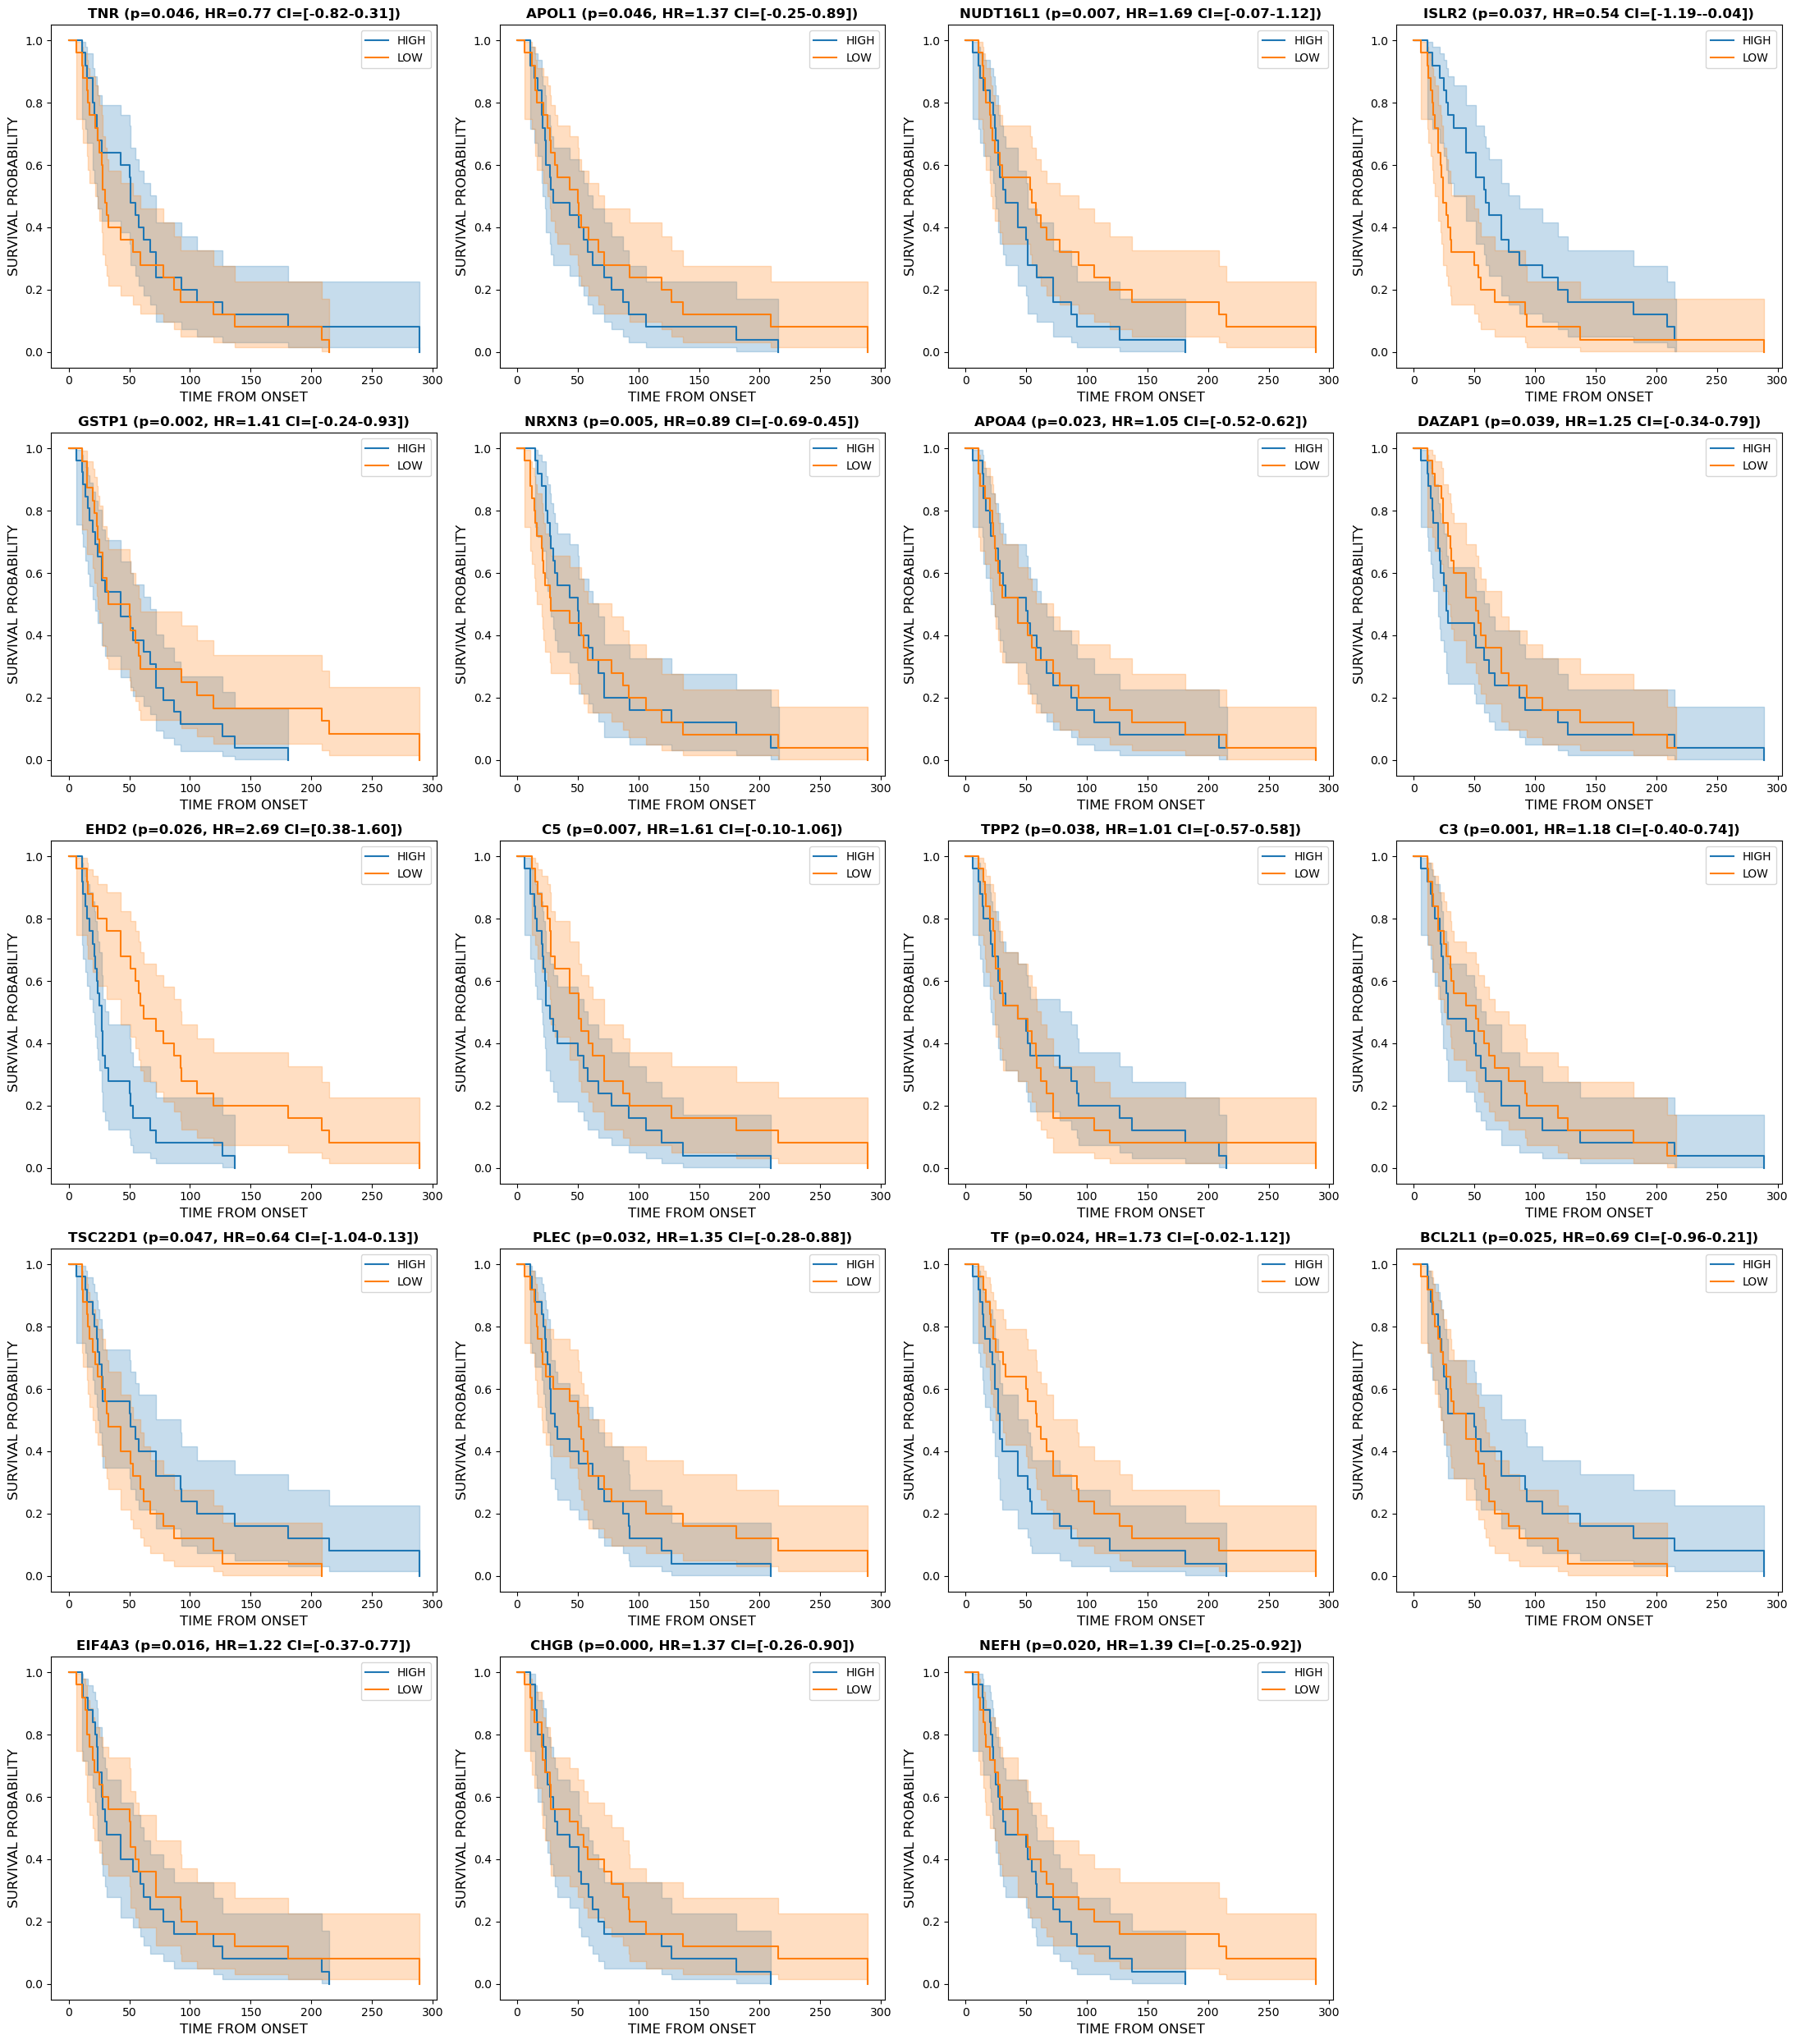

     protein   p_value        HR    CI_low   CI_high     median
0        tnr  0.045858  0.773888 -0.824942  0.312286   9.833126
1      apol1  0.045858  1.373257 -0.254957  0.889328  15.466579
2   nudt16l1  0.007415  1.690215 -0.070306  1.120017  12.611502
3      islr2  0.036502  0.539135 -1.191598 -0.043981  11.600290
4      gstp1  0.002243  1.411600 -0.244998  0.934446  11.040290
5      nrxn3  0.004936  0.890644 -0.685429  0.453808  12.021818
6      apoa4  0.023241  1.053207 -0.516612  0.620293  15.111056
7     dazap1  0.038676  1.250864 -0.344618  0.792288   8.928208
8       ehd2  0.026294  2.686946  0.379680  1.597130  12.905216
9         c5  0.007151  1.612707 -0.099455  1.055284  15.330591
10      tpp2  0.037576  1.005251 -0.567170  0.577644  10.296389
11        c3  0.001475  1.184989 -0.398614  0.738082  12.466169
12   tsc22d1  0.047157  0.635091 -1.036689  0.128714  10.495254
13      plec  0.032460  1.352620 -0.280609  0.884696   8.641689
14        tf  0.023974  1.733293 -0.0231

In [52]:
n_proteins = len(proteins)
n_cols = 4
n_rows = math.ceil(n_proteins / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 5*n_rows))
axes = axes.flatten()

results = []

for i, p in enumerate(proteins):
    cutoff = reg_als[p].median()
    reg_als['group'] = np.where(reg_als[p] >= cutoff, 'High', 'Low')
    
    mask_high = reg_als['group'] == 'High'
    mask_low  = reg_als['group'] == 'Low'
    
    # KM curves
    kmf_high = KaplanMeierFitter().fit(reg_als.loc[mask_high, 'time_from_onset'],
                                       reg_als.loc[mask_high, 'outcome_1-rip'],
                                       label='HIGH')
    kmf_low  = KaplanMeierFitter().fit(reg_als.loc[mask_low, 'time_from_onset'],
                                       reg_als.loc[mask_low, 'outcome_1-rip'],
                                       label='LOW')
    
    ax = axes[i]
    kmf_high.plot(ax=ax, ci_show=True)
    kmf_low.plot(ax=ax, ci_show=True)
    
    # Get p-value from your results_df instead of recalculating
    pval = pval_map[p.lower()]
    
    # Cox model for HR
    tmp = reg_als[['time_from_onset','outcome_1-rip','group']].copy()
    tmp['group'] = (tmp['group'] == 'High').astype(int)  # binary covariate
    cph = CoxPHFitter()
    cph.fit(tmp, duration_col='time_from_onset', event_col='outcome_1-rip')
    hr = cph.hazard_ratios_['group']
    ci = cph.confidence_intervals_.loc['group']
    ci_low = ci['95% lower-bound']
    ci_high = ci['95% upper-bound']

        
    # Annotated title
    ax.set_title(f"{p.upper()} (p={pval:.3f}, HR={hr:.2f} CI=[{ci_low:.2f}-{ci_high:.2f}])",
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('TIME FROM ONSET', fontsize=12)
    ax.set_ylabel('SURVIVAL PROBABILITY', fontsize=12)
    ax.legend(fontsize=10)
    
    results.append({'protein': p, 'p_value': pval, 'HR': hr,
                    'CI_low': ci_low, 'CI_high': ci_high, 'median': cutoff})

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
print(results_df)

In [54]:
significant_df = results_df[
    (results_df["p_value"] < 0.05) &
    ((results_df["CI_low"] > 1) | (results_df["CI_high"] < 1))
].copy()

print("Significant proteins based on p-value and CI:")
print(significant_df)

Significant proteins based on p-value and CI:
  Protein  Median cutoff   p_value        HR    CI_low   CI_high
3   islr2       11.60029  0.030952  0.539135 -1.191598 -0.043981


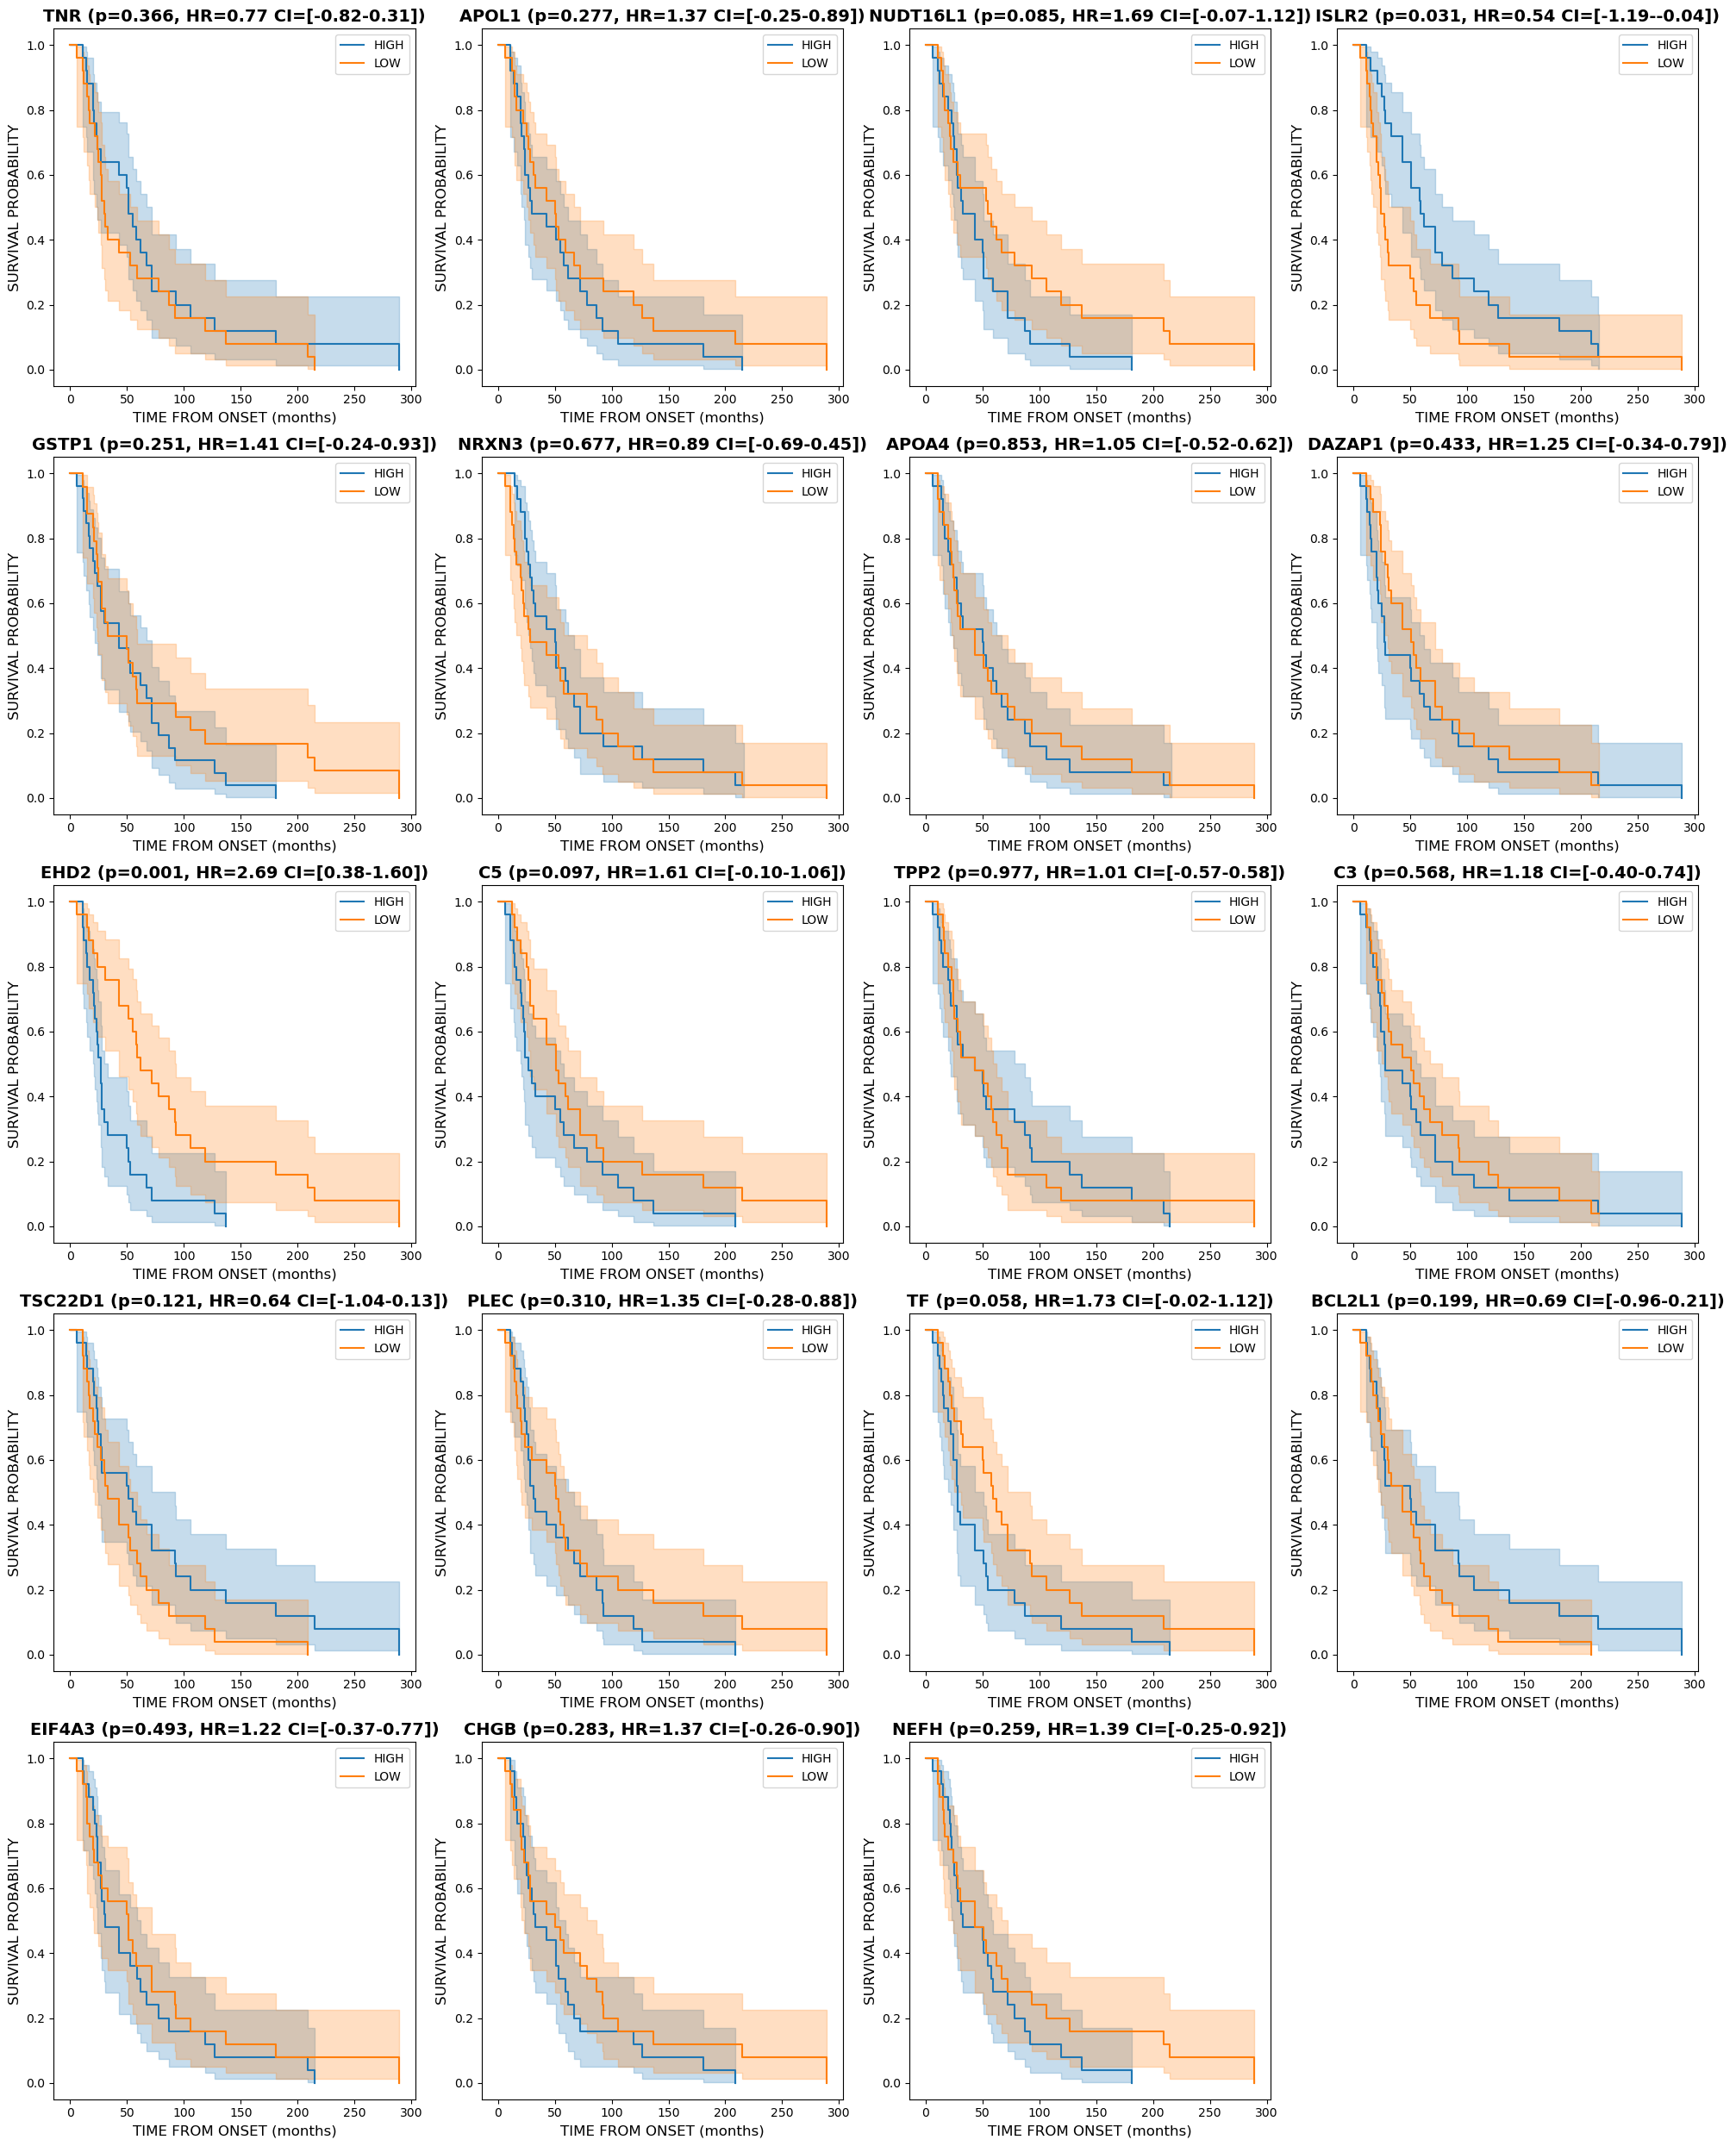

     Protein  Median cutoff   p_value        HR    CI_low   CI_high
0        tnr       9.833126  0.366168  0.773888 -0.824942  0.312286
1      apol1      15.466579  0.276502  1.373257 -0.254957  0.889328
2   nudt16l1      12.611502  0.084674  1.690215 -0.070306  1.120017
3      islr2      11.600290  0.030952  0.539135 -1.191598 -0.043981
4      gstp1      11.040290  0.251066  1.411600 -0.244998  0.934446
5      nrxn3      12.021818  0.677220  0.890644 -0.685429  0.453808
6      apoa4      15.111056  0.852611  1.053207 -0.516612  0.620293
7     dazap1       8.928208  0.433048  1.250864 -0.344618  0.792288
8       ehd2      12.905216  0.001026  2.686946  0.379680  1.597130
9         c5      15.330591  0.096510  1.612707 -0.099455  1.055284
10      tpp2      10.296389  0.976565  1.005251 -0.567170  0.577644
11        c3      12.466169  0.568296  1.184989 -0.398614  0.738082
12   tsc22d1      10.495254  0.120876  0.635091 -1.036689  0.128714
13      plec       8.641689  0.310029  1.352620 

In [53]:
import math

n_proteins = len(proteins)
n_cols = 4
n_rows = math.ceil(n_proteins / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

results = []

for i, p in enumerate(proteins):
    cutoff = reg_als[p].median()
    reg_als['group'] = np.where(reg_als[p] >= cutoff, 'High', 'Low')
    
    mask_high = reg_als['group'] == 'High'
    mask_low  = reg_als['group'] == 'Low'
    
    # Kaplan–Meier curves
    kmf_high = KaplanMeierFitter().fit(
        reg_als.loc[mask_high, 'time_from_onset'],
        reg_als.loc[mask_high, 'outcome_1-rip'],
        label='HIGH'
    )
    kmf_low = KaplanMeierFitter().fit(
        reg_als.loc[mask_low, 'time_from_onset'],
        reg_als.loc[mask_low, 'outcome_1-rip'],
        label='LOW'
    )
    
    ax = axes[i]
    kmf_high.plot(ax=ax, ci_show=True)
    kmf_low.plot(ax=ax, ci_show=True)
    
    # Log-rank test for p-value
    lr = logrank_test(
        reg_als.loc[mask_high, 'time_from_onset'], reg_als.loc[mask_low, 'time_from_onset'],
        reg_als.loc[mask_high, 'outcome_1-rip'], reg_als.loc[mask_low, 'outcome_1-rip']
    )
    pval = lr.p_value
    
    # Cox model for HR and CI
    tmp = reg_als[['time_from_onset','outcome_1-rip','group']].copy()
    tmp['group'] = (tmp['group'] == 'High').astype(int)  # binary covariate
    cph = CoxPHFitter()
    cph.fit(tmp, duration_col='time_from_onset', event_col='outcome_1-rip')
    hr = cph.hazard_ratios_['group']
    ci = cph.confidence_intervals_.loc['group']
    ci_low = ci['95% lower-bound']
    ci_high = ci['95% upper-bound']
    
    # Annotated title with p-value and HR
    ax.set_title(f"{p.upper()} (p={pval:.3f}, HR={hr:.2f} CI=[{ci_low:.2f}-{ci_high:.2f}])",
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('TIME FROM ONSET (months)', fontsize=12)
    ax.set_ylabel('SURVIVAL PROBABILITY', fontsize=12)
    ax.legend(fontsize=10)
    
    # Collect results
    results.append({
        'Protein': p,
        'Median cutoff': cutoff,
        'p_value': pval,
        'HR': hr,
        'CI_low': ci_low,
        'CI_high': ci_high
    })

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create results table
results_df = pd.DataFrame(results)
print(results_df)

# Save to Excel
results_df.to_excel("KM_Cox_Results.xlsx", index=False)


In [55]:
significant_df = results_df[
    (results_df["p_value"] < 0.05) &
    ((results_df["CI_low"] > 1) | (results_df["CI_high"] < 1))
].copy()

print("Significant proteins based on p-value and CI:")
print(significant_df)

Significant proteins based on p-value and CI:
  Protein  Median cutoff   p_value        HR    CI_low   CI_high
3   islr2       11.60029  0.030952  0.539135 -1.191598 -0.043981
